# Objective
* Identify the Which Platform have more impact on Sales
* To build the Model which will help to Predict the future sales based on Money invest in Different Platform for advertisement

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Data Import

In [4]:
new = pd.read_csv(r"C:\Users\saura\Downloads\codesoft internship\advertising (2).csv")
new.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Datatype

In [6]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Univariate Analysis

In [8]:
new.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## EDA
* Identify and Treatment of outlier

<Axes: >

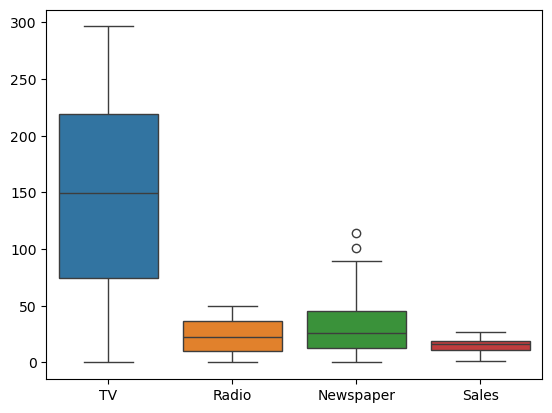

In [10]:
sns.boxplot(data = new)

## Treatment of outlier

In [12]:
q1 = new['Newspaper'].quantile(0.25)
q3 = new['Newspaper'].quantile(0.75)
iqr = q3-q1

upper_limit = q3+1.5*iqr
upper_limit

93.625

In [13]:
new['Newspaper'] = np.where(new['Newspaper'] > upper_limit,upper_limit,new['Newspaper']) 

<Axes: >

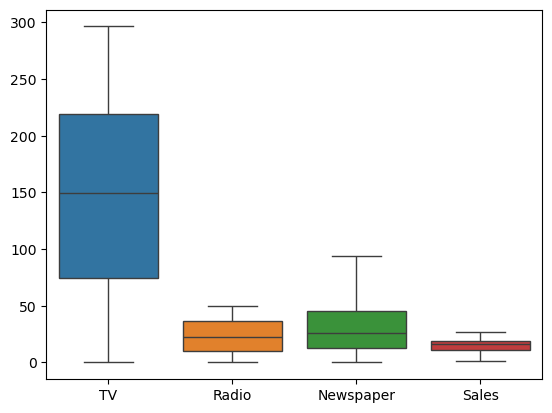

In [14]:
sns.boxplot(data = new)

## Missing Value

In [16]:
new.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Splitting data into train and test
* we use 70% data for training and rest data for testing

In [18]:
new.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [19]:
X = new.drop('Sales', axis= 1)
y = new[['Sales']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 ,random_state=120)

In [20]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,Sales,TV,Radio,Newspaper
111,21.8,241.7,38.0,23.2
156,15.3,93.9,43.5,50.5
140,10.9,73.4,17.0,12.9
171,17.5,164.5,20.9,47.4
157,10.1,149.8,1.3,24.3


## Correlation matrix

<Axes: xlabel='TV', ylabel='Sales'>

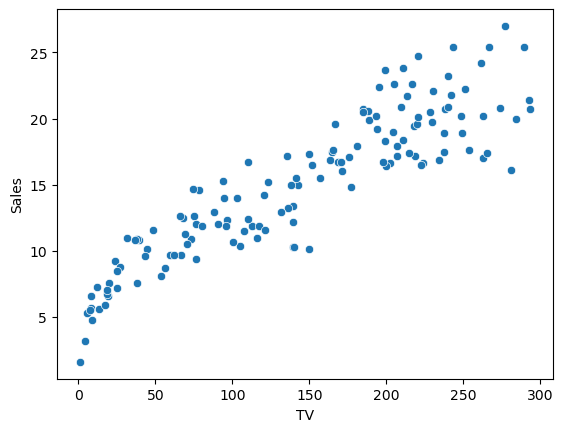

In [22]:
sns.scatterplot(x='TV', y='Sales',data=train)

In [23]:
train.corr()

,Sales,TV,Radio,Newspaper
Sales,1.000000,0.902636,0.415326,0.156391
TV,0.902636,1.000000,0.147367,0.073830
Radio,0.415326,0.147367,1.000000,0.300592
Newspaper,0.156391,0.073830,0.300592,1.000000


<Axes: >

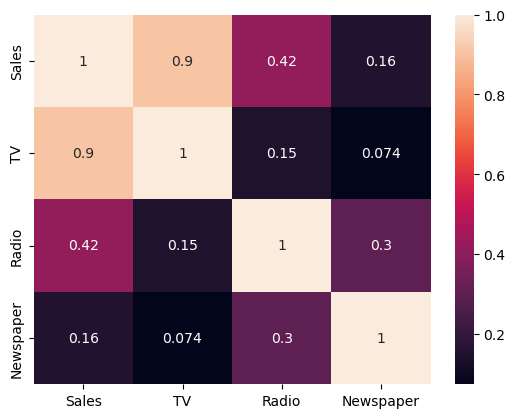

In [24]:
sns.heatmap(train.corr(),annot = True)

### TV has a 90% strong positive correlation with Sales.
* TV has the highest impact on Sales.
* There is no collinearity in the data, so every platform is independent.

## Multi-colinearity

In [27]:
X1 = train.drop(['Sales'],axis=1)
VIF = pd.Series([variance_inflation_factor(X1.values, i) # i = 0
                           for i in range(X1.shape[1])],  # i= 0,1,2
                          index = X1.columns)  # column name
VIF

TV           2.730779
Radio        3.338435
Newspaper    2.842430
dtype: float64

* No multi-colinearity in data

## Model Building

In [30]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
Model3 = lreg.fit(X_train,y_train)

In [31]:
np.round(Model3.intercept_,4)  # B0

array([4.4342])

In [32]:
np.round(Model3.coef_,4)

array([[0.0558, 0.1059, 0.0018]])

In [33]:
Model3.feature_names_in_

array(['TV', 'Radio', 'Newspaper'], dtype=object)

In [34]:
np.round(Model3.score(X_train,y_train),2)

0.9

## Prediction on Train Dataset

In [36]:
train.head(2)

,Sales,TV,Radio,Newspaper
111,21.8,241.7,38.0,23.2
156,15.3,93.9,43.5,50.5


In [37]:
train['fitted_value']= np.round(Model3.predict(X_train),1)
train['Residual']= np.round(train.Sales-train.fitted_value,1)
train.head()

,Sales,TV,Radio,Newspaper,fitted_value,Residual
111,21.8,241.7,38.0,23.2,22.0,-0.2
156,15.3,93.9,43.5,50.5,14.4,0.9
140,10.9,73.4,17.0,12.9,10.4,0.5
171,17.5,164.5,20.9,47.4,15.9,1.6
157,10.1,149.8,1.3,24.3,13.0,-2.9


## Accuracy on Train

In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Sales, train.fitted_value)
print('R-Squared score for model Performance on Train :', np.round(r2,2))

R-Squared score for model Performance on Train : 0.9


## Loss / Cost / Error Function -- RMSE

In [41]:
from sklearn.metrics import mean_squared_error

model_mse = mean_squared_error(train['Sales'], train['fitted_value'])
model_rmse = np.sqrt(model_mse)
print("Train RMSE : {:.3}".format(model_rmse))

Train RMSE : 1.75


## Assumption of model
* Linearity
* Homoscedasicity
* Normality
* Model Error has to be independently identificaly Distibuted

## Linearity

<Axes: title={'center': 'Sales vs TV'}, xlabel='TV', ylabel='Sales'>

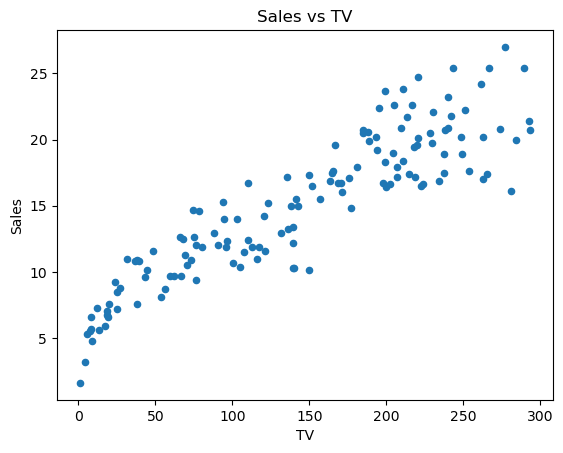

In [44]:
train.plot.scatter(x='TV', y='Sales', title='Sales vs TV')

## Homoscedasicity

<Axes: xlabel='fitted_value', ylabel='Residual'>

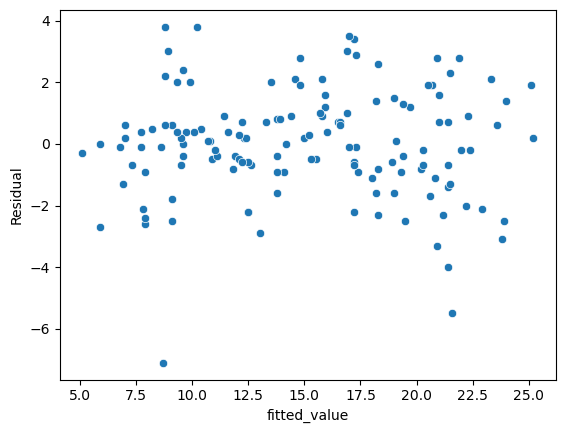

In [46]:
sns.scatterplot(x='fitted_value', y='Residual',data=train)

## Normality

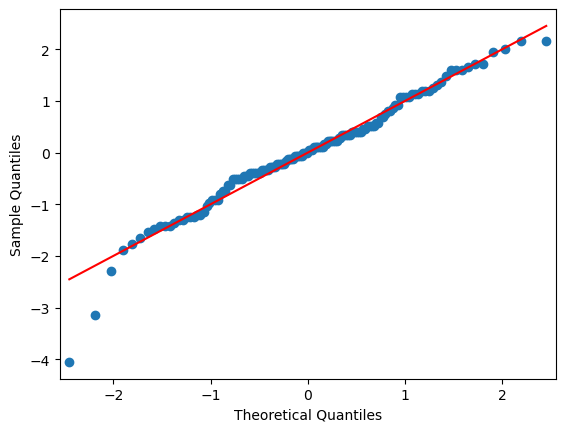

In [48]:
import statsmodels.api as sm
fig = sm.qqplot(train['Residual'], fit=True, line='s') 
plt.show()

## Model Error are IID

<Axes: ylabel='Frequency'>

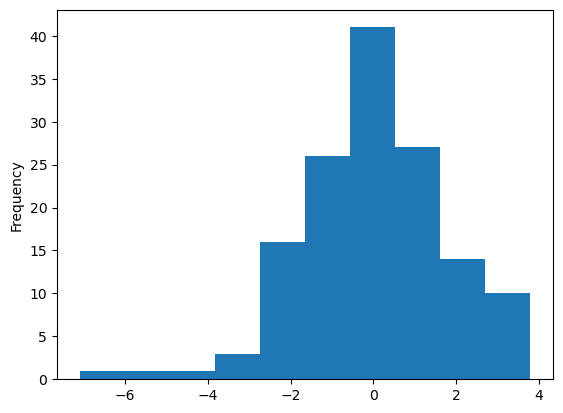

In [50]:
train['Residual'].plot.hist()

## Prediction on train data

In [52]:
df_test = pd.concat([X_test,y_test],axis=1)
df_test.head()

,TV,Radio,Newspaper,Sales
87,110.7,40.6,63.2,16.0
118,125.7,36.9,79.2,15.9
80,76.4,26.7,22.3,11.8
198,283.6,42.0,66.2,25.5
62,239.3,15.5,27.3,20.7


In [53]:
df_test['Prediction']= np.round(Model3.predict(X_test),1) 
df_test.head()

,TV,Radio,Newspaper,Sales,Prediction
87,110.7,40.6,63.2,16.0,15.0
118,125.7,36.9,79.2,15.9,15.5
80,76.4,26.7,22.3,11.8,11.6
198,283.6,42.0,66.2,25.5,24.8
62,239.3,15.5,27.3,20.7,19.5


## Prediction on test data

In [55]:
r2 = r2_score(df_test.Sales, df_test.Prediction)
print('R-Squared score for model Performance on Test :', np.round(r2,2))

R-Squared score for model Performance on Test : 0.92


In [56]:
model_mse = mean_squared_error(df_test['Sales'], df_test['Prediction'])
model_rmse = np.sqrt(model_mse)
print("Test RMSE  : {:.3}".format(model_rmse))

Test RMSE  : 1.39
